In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size': '12', 'weight':'bold'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['text.usetex'] = False

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('6')
%matplotlib inline

# Hydration site analysis - without restraints

In [2]:
apo_b1_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/D14-apo/\
1-block1/run_hsa/SSTMap_HSA/D14-apo_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

apo_b2_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/D14-apo/\
2-block2/run_hsa/SSTMap_HSA/D14-apo_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

apo_b3_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/D14-apo/\
3-whole/run_hsa/SSTMap_HSA/D14-apo_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

holo_b1_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/D14-holo/\
1-block1/run_hsa/SSTMap_HSA/D14-holo_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

holo_b2_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/D14-holo/\
2-block2/run_hsa/SSTMap_HSA/D14-holo_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

holo_b3_hsa = np.loadtxt("/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/D14-holo/\
3-whole/run_hsa/SSTMap_HSA/D14-holo_hsa_summary.txt",   skiprows=1, usecols=list(range(0,27)))

0 En.F
1 En.F
2 En.F
3 Fr.F
4 En.U
5 En.U
6 En.F
7 En.U
8 En.F
9 Fr.F
10 En.U
11 En.U
12 En.F
13 En.F
14 En.F
15 En.U
16 En.F
17 En.U
18 En.U
19 En.U
20 En.U
21 En.U
22 En.F
23 En.U
24 En.F
25 En.F
26 En.F
27 En.U
28 En.U


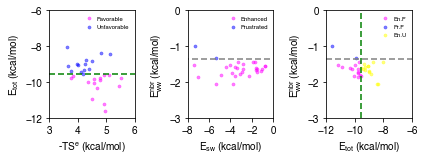

In [3]:
ax0 = plt.subplot2grid((2,3),(0,0))
ax0.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []
for i in range(len(apo_b3_hsa)):
    if apo_b3_hsa[i][12] < -9.53:
        en_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] > -9.53:
        fr_data.append(apo_b3_hsa[i])
en_data = np.array(en_data)  
fr_data = np.array(fr_data)

ax0.scatter(-en_data.T[16], en_data.T[12], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Favorable')
ax0.scatter(-fr_data.T[16], fr_data.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Unfavorable')

#ax0.scatter(-apo_b3_hsa.T[16], apo_b3_hsa.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlim(3,6)
ax0.set_ylim(-12,-6)
ax0.set_xticks((3,4,5,6))
ax0.set_yticks((-12,-10,-8,-6))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax1 = plt.subplot2grid((2,3),(0,1))
ax1.plot(np.linspace(-16,0,num=101), -1.36*np.ones(101),color='grey', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []
for i in range(len(apo_b3_hsa)):
    if apo_b3_hsa[i][13] < -1.36:
        en_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][13] > -1.36:
        fr_data.append(apo_b3_hsa[i])
en_data = np.array(en_data)        
fr_data = np.array(fr_data)

ax1.scatter(en_data.T[6], en_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Enhanced')
ax1.scatter(fr_data.T[6], fr_data.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Frustrated')
#ax1.scatter(apo_b3_hsa.T[6], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlim(-8,0)
ax1.set_ylim(-3,0)
ax1.set_xticks((-8,-6,-4,-2,0))
ax1.set_yticks((-3, -2,-1,0))
ax1.set_xlabel(r'E$_{sw}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax1.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,2))
ax2.plot(np.linspace(-12,-6,num=101), -1.36*np.ones(101), color='grey', linestyle=':',dashes=[4, 2])
ax2.plot(-9.53*np.ones(101), np.linspace(-3,1,num=101), color='green', linestyle=':',dashes=[4, 2])

enF_data = []
enU_data = []
frF_data = []
frU_data = []
for i in range(len(apo_b3_hsa)):
    if apo_b3_hsa[i][12] < -9.53 and apo_b3_hsa[i][13] < -1.36:
        print(i, 'En.F')
        enF_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] > -9.53 and apo_b3_hsa[i][13] < -1.36:
        print(i, 'En.U')
        enU_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] < -9.53 and apo_b3_hsa[i][13] > -1.36:
        print(i, 'Fr.F')
        frF_data.append(apo_b3_hsa[i])
    if apo_b3_hsa[i][12] > -9.53 and apo_b3_hsa[i][13] > -1.36:
        print(i, 'Fr.U')
        frU_data.append(apo_b3_hsa[i])
enF_data = np.array(enF_data)        
frF_data = np.array(frF_data)
enU_data = np.array(enU_data)        
frU_data = np.array(frU_data)

ax2.scatter(enF_data.T[12], enF_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='En.F')
ax2.scatter(frF_data.T[12], frF_data.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Fr.F')
ax2.scatter(enU_data.T[12], enU_data.T[13], color='yellow', s=10, linewidths=0.5, alpha=0.5, label='En.U')
#ax2.scatter(frU_data.T[12], frU_data.T[13], color='orange', s=10, linewidths=0.5, alpha=0.5, label='Fr.U')

#ax2.scatter(apo_b3_hsa.T[12], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax2.set_xlim(-12,-6)
ax2.set_ylim(-3,0)
ax2.set_xticks((-12,-10,-8,-6))
ax2.set_yticks((-3, -2,-1,0))
ax2.set_xlabel(r'E$_{tot}$ (kcal/mol)', fontweight="bold")
ax2.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax2.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/Figures/\
Figure_Water_APO.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

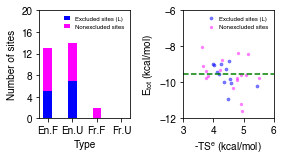

In [10]:
ax1 = plt.subplot2grid((2,3),(0,1))
ax1.set_xlim(3,6)
ax1.set_ylim(-12,-6)
ax1.set_xticks((3,4,5,6))
ax1.set_yticks((-12,-10,-8,-6))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")

excluded_idx   = [6,10,11,12,15,16,17,18,20,21,22,25]
elusive_idx    = [0,1,2,3,4,5,7,8,9,13,14,19,23,24,26,27,28]
excluded_data  = []
elusive_data   = []

for idx in excluded_idx:
    excluded_data.append(apo_b3_hsa[idx])
for idx in elusive_idx:
    elusive_data.append(apo_b3_hsa[idx])

ax1.scatter(-np.array(excluded_data).T[16], np.array(excluded_data).T[12], color='blue', label='Excluded sites (L)', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-np.array(elusive_data).T[16], np.array(elusive_data).T[12], color='magenta', label='Nonexcluded sites', s=10, linewidths=0.1, alpha=0.5)
ax1.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--')
ax1.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,0))
ax2.set_ylim(0,20)
ax2.set_yticks((0,4,8,12,16,20))
ax2.set_xlabel(r"Type", fontweight="bold")
ax2.set_ylabel(r"Number of sites", fontweight="bold")

labels = ['En.F', 'En.U', 'Fr.F', 'Fr.U']
excluded_L  = np.array([5, 7, 0, 0])
#excluded_P  = np.array([0, 0, 0, 0])
nonexcluded = np.array([8, 7, 2, 0])
width = 0.35       # the width of the bars: can also be len(x) sequence

ax2.bar(labels, excluded_L,  width, label='Excluded sites (L)', color='blue')
#ax2.bar(labels, excluded_P,  width, bottom=excluded_L, label='Excluded sites (P)', color='red')
ax2.bar(labels, nonexcluded, width, bottom=excluded_L, label='Nonexcluded sites', color='magenta')

ax2.legend(loc=1, ncol=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/Figures/\
Figure_Water_Excluded.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

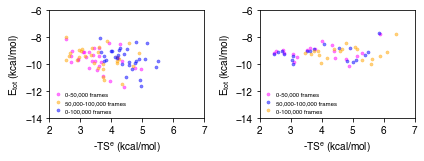

In [7]:
ax0 = plt.subplot2grid((2,2),(0,0))
ax1 = plt.subplot2grid((2,2),(0,1))
ax0.scatter(-apo_b1_hsa.T[16], apo_b1_hsa.T[12], color='magenta',  label='0-50,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax0.scatter(-apo_b2_hsa.T[16], apo_b2_hsa.T[12], color='orange', label='50,000-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax0.scatter(-apo_b3_hsa.T[16], apo_b3_hsa.T[12], color='blue',  label='0-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlim(2,7)
ax0.set_ylim(-14,-6)
ax0.set_xticks((2,3,4,5,6,7))
ax0.set_yticks((-14,-12,-10,-8,-6))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
ax1.scatter(-holo_b1_hsa.T[16], holo_b1_hsa.T[12], color='magenta',  label='0-50,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-holo_b2_hsa.T[16], holo_b2_hsa.T[12], color='blue', label='50,000-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-holo_b3_hsa.T[16], holo_b3_hsa.T[12], color='orange', label='0-100,000 frames', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlim(2,7)
ax1.set_ylim(-14,-6)
ax1.set_xticks((2,3,4,5,6,7))
ax1.set_yticks((-14,-12,-10,-8,-6))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)
plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/Figures/\
Figure_APO_Convergence.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

In [8]:
# Enthalpy changes 
excluded_idx   = [6,10,11,12,15,16,17,18,20,21,22,25]
bulk_energy    = -9.53

dE, dS = 0, 0
for idx in excluded_idx:
    dE += bulk_energy - apo_b3_hsa.T[12][idx] 
    dS += apo_b3_hsa.T[16][idx]
print(dE, dS)

0.6392040000000065 -52.90956


19
1 0.8508610000000001 0.3667189999999998
2 0.9347459999999987 0.027594000000000563
3 1.9469510000000003 -0.6477130000000004
5 0.7130540000000005 -1.2425860000000002
6 0.5297000000000001 0.14767300000000017
4.975312 -1.348313


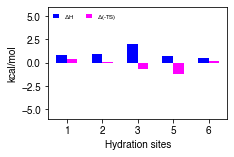

In [11]:
# Enthalpy changes 
conserved_idx   = [1, 2, 3, 5, 6]
holo_idx        = [6, 3, 4, 0, 8]

print(len(holo_b3_hsa.T[16]))

dE, dS = 0, 0
ddEs = []
ddSs = []
for i, idx in enumerate(conserved_idx):
    ddE = holo_b3_hsa.T[12][holo_idx[i]] - apo_b3_hsa.T[12][idx] 
    ddS = holo_b3_hsa.T[16][holo_idx[i]] - apo_b3_hsa.T[16][idx]
    dE += ddE
    dS += ddS
    ddEs.append(ddE)
    ddSs.append(ddS)
    print(idx, ddE, ddS)
print(dE, dS)

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_ylim(-6,6)
ax1.set_yticks((-5,-2.5,0,2.5,5))

width  = 0.3
index  = np.arange(5)

ax1.bar(np.array(index) + 0.85, ddEs,  width, label=r'$\Delta$H', color='blue')
ax1.bar(np.array(index) + 1.15, ddSs,  width, label=r'$\Delta$(-TS)', color='magenta')
ax1.set_xlabel(r"Hydration sites", fontweight="bold")
ax1.set_xticks(np.array(index)+1)
ax1.set_xticklabels((str(r) for r in conserved_idx))
ax1.set_ylabel(r"kcal/mol", fontweight="bold")
ax1.legend(loc=2, ncol=2, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/Figures/\
Figure_Water_HOLO_DIFF.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

1 En.U
2 En.F
3 En.U
4 En.F
5 En.U
6 En.U
7 Fr.U
8 En.F
9 En.U
10 En.U
11 En.U
12 En.F
13 En.F
14 En.U
15 En.U
16 En.U
17 En.U
18 En.U


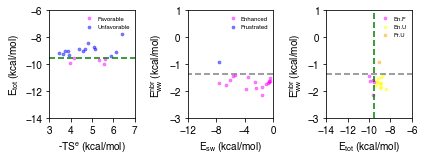

In [18]:
ax0 = plt.subplot2grid((2,3),(0,0))
ax0.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []
for i in range(len(holo_b3_hsa)):
    if holo_b3_hsa[i][12] < -9.53:
        en_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] > -9.53:
        fr_data.append(holo_b3_hsa[i])
en_data = np.array(en_data)
fr_data = np.array(fr_data)

ax0.scatter(-en_data.T[16], en_data.T[12], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Favorable')
ax0.scatter(-fr_data.T[16], fr_data.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Unfavorable')

#ax0.scatter(-apo_b3_hsa.T[16], apo_b3_hsa.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlim(3,7)
ax0.set_ylim(-12,-6)
ax0.set_xticks((3,4,5,6,7))
ax0.set_yticks((-14,-12,-10,-8,-6))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax1 = plt.subplot2grid((2,3),(0,1))
ax1.plot(np.linspace(-16,0,num=101), -1.36*np.ones(101),color='grey', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []
for i in range(len(holo_b3_hsa)):
    if holo_b3_hsa[i][13] < -1.36:
        en_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][13] > -1.36:
        fr_data.append(holo_b3_hsa[i])
en_data = np.array(en_data)        
fr_data = np.array(fr_data)

ax1.scatter(en_data.T[6], en_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Enhanced')
ax1.scatter(fr_data.T[6], fr_data.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Frustrated')
#ax1.scatter(apo_b3_hsa.T[6], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlim(-12,0)
ax1.set_ylim(-3,1)
ax1.set_xticks((-12,-8,-4,0))
ax1.set_yticks((-3,-2,-1,0,1))
ax1.set_xlabel(r'E$_{sw}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax1.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,2))
ax2.plot(np.linspace(-14,-6,num=101), -1.36*np.ones(101), color='grey', linestyle=':',dashes=[4, 2])
ax2.plot(-9.53*np.ones(101), np.linspace(-3,1,num=101), color='green', linestyle=':',dashes=[4, 2])

enF_data = []
enU_data = []
frF_data = []
frU_data = []
for i in range(len(holo_b3_hsa)):
    if holo_b3_hsa[i][12] <= -9.53 and holo_b3_hsa[i][13] <= -1.36:
        print(i, 'En.F')
        enF_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] >= -9.53 and holo_b3_hsa[i][13] <= -1.36:
        print(i, 'En.U')
        enU_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] <= -9.53 and holo_b3_hsa[i][13] >= -1.36:
        print(i, 'Fr.F')
        frF_data.append(holo_b3_hsa[i])
    if holo_b3_hsa[i][12] >= -9.53 and holo_b3_hsa[i][13] >= -1.36:
        print(i, 'Fr.U')
        frU_data.append(holo_b3_hsa[i])
enF_data = np.array(enF_data)        
frF_data = np.array(frF_data)
enU_data = np.array(enU_data)        
frU_data = np.array(frU_data)

ax2.scatter(enF_data.T[12], enF_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='En.F')
#ax2.scatter(frF_data.T[12], frF_data.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Fr.F')
ax2.scatter(enU_data.T[12], enU_data.T[13], color='yellow', s=10, linewidths=0.5, alpha=0.5, label='En.U')
ax2.scatter(frU_data.T[12], frU_data.T[13], color='orange', s=10, linewidths=0.5, alpha=0.5, label='Fr.U')

#ax2.scatter(apo_b3_hsa.T[12], apo_b3_hsa.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax2.set_xlim(-14,-6)
ax2.set_ylim(-3,1)
ax2.set_xticks((-14,-12,-10,-8,-6))
ax2.set_yticks((-3, -2,-1,0,1))
ax2.set_xlabel(r'E$_{tot}$ (kcal/mol)', fontweight="bold")
ax2.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax2.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/11-Strigolactone/water/analysis/Figures/\
Figure_Water_HOLO.png', figsize=(10,10), dpi=1000, bbox_inches='tight')